# Linear Regression
A widely used statistical technique for predicting a continuous outcome variable based on one or more predictor variables.

* **Linear Regression** <br/>
y = wx + b

* **Simple Linear Regression** <br/>
y=mx+b

* **Multiple Linear Regression** <br/>
y = w0​+w1​*x1​+w2*​x2​+…+wn​*xn​+b

# Ordinary Least Squares (OLS)
A linear regression method that employs a closed-form solution, calculating optimal coefficients to analytically minimize the sum of squared differences between predicted and actual values. This method involves finding the coefficients using linear algebra operations and is well-suited for smaller datasets, where computational efficiency is less critical. <br>

yᵢ^ ^​ = w0​ + w1​*xᵢ+εᵢ

* xi​ is the value of the independent variable for the i-th observation.
* w0​ is the y-intercept (constant term).
* w1​ is the slope coefficient.
* εᵢ is the error term representing the difference between the observed and predicted values (yᵢ-yᵢ^) for the i-th observation.


In [2]:
from math import sqrt
import numpy as np

# Calculate RMSE
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for y, y_hat in zip(actual,predicted) :
    prediction_error = y - y_hat
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

In [3]:
# slope and intercept
def compute_coefficient(x, y):
  n = len(x)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  # covariance
  numerator = 0
  # variance
  denominator = 0

  for i in range(n):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2

  # Calculate coefficients
  slope = numerator / denominator
  intercept = y_mean - slope * x_mean

  return slope, intercept

In [4]:
def predict(x, w1, w0):
  return w1 * x + w0

In [5]:
# toy dataset
x = np.arange(1, 51)

# slope
y = x*3+5

# random error for variations
y[np.random.randint(0, len(y), size=10)] += np.random.randint(-5, 5)

In [6]:
w1, w0 = compute_coefficient(x, y)
y_hat = predict(x,w1,w0)

# predicted coefficients
print(w1,w0)

2.9900120048019208 4.454693877551023


In [7]:
# evaluate model
def evaluate_ols(y,y_hat):
  mse = np.mean((y - y_hat) ** 2)
  return mse,np.sqrt(mse)
print(evaluate_ols(y,y_hat))

(2.5392249699879947, 1.5934945779600238)


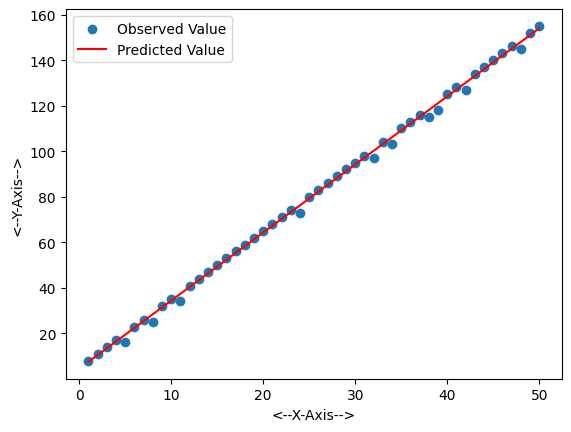

In [8]:
# visualise model
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Observed Value')
plt.plot(x, y_hat, label='Predicted Value', color='red')
plt.xlabel('<--X-Axis-->')
plt.ylabel('<--Y-Axis-->')
plt.legend()
plt.show()

# Gradient Descent
An iterative optimization algorithm used to find the minimum of a function by adjusting parameters in the direction of the steepest descent of the gradient, aiming to minimize the cost or error associated with a model’s predictions. Gradient descent is used in fields such as web analytics, online advertising, and large-scale machine-learning applications.

yᵢ^ = h(x)​ = w0​ + w1​*xᵢ

* yᵢ^ or h(x)​ is the predicted value.
* w1 is the y-intercept.
* w1 is the slope coefficient.
* xᵢ is the independent variable.

Cost Function<br>
The gradient descent algorithm minimizes the cost function by iteratively updating the parameters using the update rule.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def initialize(dim):
  w1 = np.random.rand(dim) #random weights
  w0 = np.random.rand()   #random bias
  return w1, w0

In [10]:
# cost = diff of predicted & observed value of y
def compute_cost(X,Y, y_hat):
  m = len(Y)
  cost = (1/(2*m)) * np.sum(np.square(y_hat - Y))
  return cost

In [11]:
def predict_y(X,w1,w0):
  if len(w1)==1:
    w1 = w1[0]
    return X*w1+w0
  return np.dot(X,w1)+w0

In [12]:
def update_parameters(X,Y,y_hat,cost,w0,w1,learning_rate):
  m = len(Y)
  db=(np.sum(y_hat-Y))/m
  dw=np.dot(y_hat-Y,X)/m

  w0_new=w0-learning_rate*db
  w1_new=w1-learning_rate*dw
  return w0_new,w1_new

In [13]:
# minimize the cost function
# maximum threshold


def run_gradient_descent(X,Y,alpha,max_iterations,stopping_threshold = 1e-6):
  dims = 1
  if len(X.shape)>1:
    dims = X.shape[1]
  w1,w0=initialize(dims)
  previous_cost = None
  cost_history = np.zeros(max_iterations)
  for itr in range(max_iterations):
    y_hat=predict_y(X,w1,w0)
    cost=compute_cost(X,Y,y_hat)

    # termination = cost function falling below a specified threshold
    if previous_cost and abs(previous_cost-cost)<=stopping_threshold:
      break
    cost_history[itr]=cost
    previous_cost = cost
    old_w1=w1
    old_w0=w0
    w0,w1=update_parameters(X,Y,y_hat,cost,old_w0,old_w1,alpha)

  return w0,w1,cost_history

In [24]:
# Toy Dataset

X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

In [25]:
# hyper-parameters

learning_rate = 0.0001
iterations = 10
print(X.shape,Y.shape)

w0,w1,cost_history = run_gradient_descent(X,Y,learning_rate,iterations)
print(w0,w1)

(20,) (20,)
0.06697694370653018 [1.36056125]


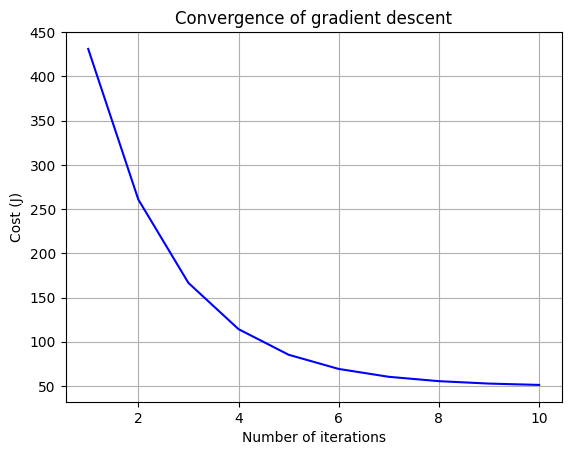

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Plot cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [27]:
# Hyperparameters
learning_rate = 0.0001
iterations = 1000

# Random seed for reproducibility
np.random.seed(42)

# Samples
m = 200

# Random features X (2D)
X = 10 * np.random.rand(m, 2)  # Scaling by 10

# Target variable y with constant weights and bias
true_weights = np.array([3, 4])
bias = 2
Y = X.dot(true_weights) + bias + np.random.randn(m)  # Random noise

w0,w1,cost_history = run_gradient_descent(X,Y,learning_rate,iterations)
print(w0,w1)

1.282428874489976 [3.30894284 3.787046  ]


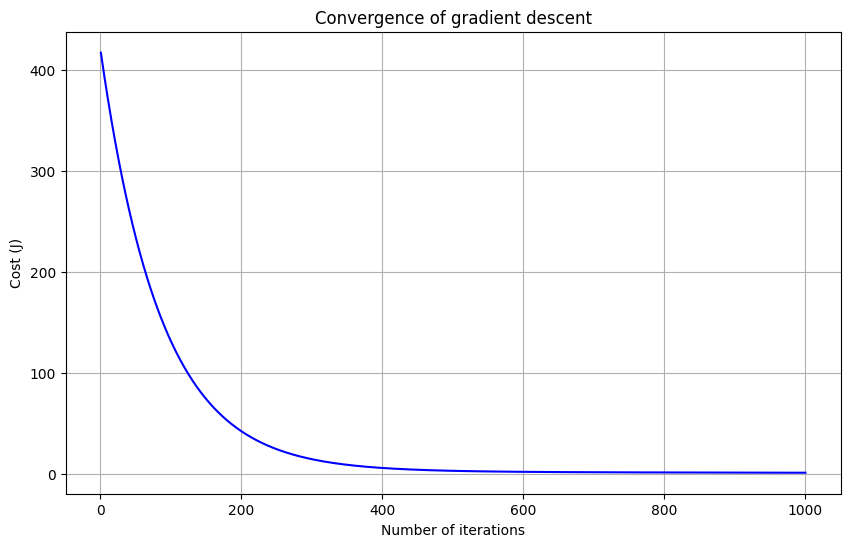

In [28]:
# visualise

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()